# SC1015 Project Team 2
> by SCSE Chen Yi, SCSE Gong Zerui, SCSE Zeng Xunyi

### Import  Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from collections import Counter

### Import training dataset

In [3]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")
df_total = pd.concat([df_train, df_test])
df_total.head(100)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.327317,-0.022256,-0.149144,-0.248645,0.133229,-0.179547,-0.306979,0.113994,-0.159712,-0.114953,...,-0.422166,-0.438911,-0.710035,0.121018,-0.023408,-0.769477,0.256167,0.038575,1,WALKING
96,0.349059,-0.022004,-0.150052,-0.303125,0.152607,-0.174298,-0.356618,0.106512,-0.141309,-0.178067,...,-0.493845,-0.538717,0.833201,0.457682,0.211527,-0.776736,0.251406,0.036180,1,WALKING
97,0.264682,-0.008592,-0.102974,-0.363238,0.036867,-0.244159,-0.425625,-0.055041,-0.243230,-0.278328,...,-0.569276,0.460655,0.765162,0.424757,0.167463,-0.786963,0.244471,0.034677,1,WALKING
98,0.284317,-0.027206,-0.212303,-0.183444,0.141076,-0.225689,-0.249080,0.110614,-0.221009,0.032522,...,-0.551872,-0.053158,0.512810,-0.811518,0.581624,-0.764185,0.260565,0.031442,1,WALKING


In [4]:
print("Data dims: ", df_total.shape)

Data dims:  (10299, 563)


In [5]:
print(df_total.dtypes)

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object


In [6]:
df_total.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


# Step 1: Data Cleaning

### a. Check for Duplicates

In [7]:
print('No of duplicates in the dataset: {}'.format(sum(df_total.duplicated())))

No of duplicates in the dataset: 0


### b. Check for NaN or Null value

In [8]:
print('We have {} NaN/Null values in the dataset'.format(df_total.isnull().values.sum()))

We have 0 NaN/Null values in the dataset


### c. Check for data imbalance

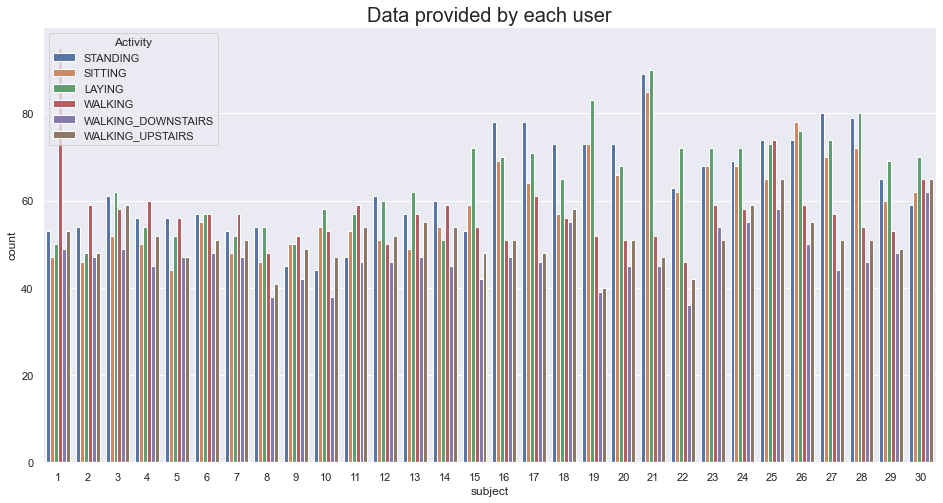

In [9]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sb.countplot(x='subject',hue='Activity', data = df_total)
plt.show()

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


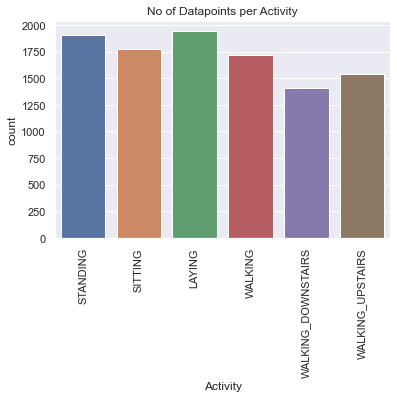

In [10]:
plt.title('No of Datapoints per Activity',fontsize=12)
sb.countplot(df_total.Activity)
plt.xticks(rotation=90)
plt.show()

Our dataset is balanced.

# Step 2:  Explore the Dataset (EDA)

### Description

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope (陀螺仪)) in that smartphone.
> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

> 'f' denotes frequency

> In physics, jerk is the rate at which an object's acceleration changes with respect to time. It is a vector quantity (having both magnitude and direction). Jerk is most commonly denoted by the symbol j and expressed in m/s^3 (SI units) or standard gravities per second (g_0/s).

### Acitivities of human in the Dataset

Number of Activities:  6
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64


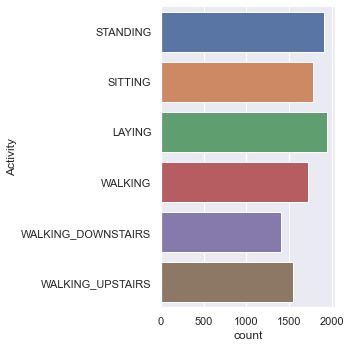

In [11]:
print("Number of Activities: ", len(df_total["Activity"].unique()))
print(df_total["Activity"].value_counts())
sb.catplot(y = "Activity", data = df_total, kind = "count")

### Subjects in Dataset (需要吗？)

Number of subjects:  30
25    409
21    408
26    392
30    383
28    382
24    381
27    376
23    372
17    368
16    366
18    364
19    360
20    354
1     347
29    344
3     341
15    328
13    327
6     325
14    323
22    321
12    320
4     317
11    316
7     308
5     302
2     302
10    294
9     288
8     281
Name: subject, dtype: int64


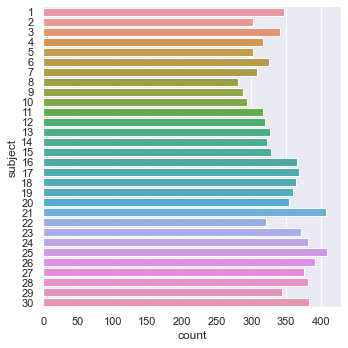

In [12]:
print("Number of subjects: ", len(df_total["subject"].unique()))
print(df_total["subject"].value_counts())
sb.catplot(y = "subject", data = df_total, kind = "count")

### Features Exploration

In [13]:
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] 
for col in df_total.columns]), orient='index').rename(columns=
{0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


#### Among the 563 featured variables, we begin by exploring the relationship between "Mag-mean" variables (13 of them) and "Activities".

In [14]:
### Removing commas, brackets and dashes
columns = df_total.columns

columns = columns.str.replace('[()]','', regex=True)
columns = columns.str.replace('[-]', '', regex=True)
columns = columns.str.replace('[,]','', regex=True)

df_total.columns = columns
df_total

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [15]:
### The 13 chosen variables
explore_data = pd.DataFrame(df_total[["tBodyAccMagmean", "tGravityAccMagmean", "tBodyAccJerkMagmean",
"tBodyGyroMagmean", "tBodyGyroJerkMagmean", "fBodyAccMagmean", "fBodyAccMagmeanFreq","fBodyBodyAccJerkMagmean",
"fBodyBodyAccJerkMagmeanFreq","fBodyBodyGyroMagmean","fBodyBodyGyroMagmeanFreq","fBodyBodyGyroJerkMagmean","fBodyBodyGyroJerkMagmeanFreq"]])
explore_data

,tBodyAccMagmean,tGravityAccMagmean,tBodyAccJerkMagmean,tBodyGyroMagmean,tBodyGyroJerkMagmean,fBodyAccMagmean,fBodyAccMagmeanFreq,fBodyBodyAccJerkMagmean,fBodyBodyAccJerkMagmeanFreq,fBodyBodyGyroMagmean,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagmeanFreq
0,-0.959434,-0.959434,-0.993306,-0.968959,-0.994248,-0.952155,-0.088436,-0.993726,0.346989,-0.980135,-0.128989,-0.991990,-0.074323
1,-0.979289,-0.979289,-0.991253,-0.980683,-0.995123,-0.980857,-0.044150,-0.990335,0.532061,-0.988296,-0.271958,-0.995854,0.158075
2,-0.983703,-0.983703,-0.988531,-0.976317,-0.993403,-0.987795,0.257899,-0.989280,0.660795,-0.989255,-0.212728,-0.995031,0.414503
3,-0.986542,-0.986542,-0.993078,-0.982060,-0.995502,-0.987519,0.073581,-0.992769,0.678921,-0.989413,-0.035684,-0.995221,0.404573
4,-0.992827,-0.992827,-0.993480,-0.985204,-0.995808,-0.993591,0.394310,-0.995523,0.559058,-0.991433,-0.273582,-0.995093,0.087753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,-0.200885,-0.200885,-0.455923,-0.393764,-0.649483,-0.273191,-0.197640,-0.422172,-0.110967,-0.477844,0.093839,-0.601424,0.074472
2943,-0.170563,-0.170563,-0.425750,-0.303153,-0.632231,-0.209487,-0.123084,-0.265218,0.125434,-0.491855,0.092162,-0.566344,0.101859
2944,-0.207603,-0.207603,-0.463232,-0.288646,-0.649748,-0.236606,0.001206,-0.247441,0.111669,-0.601283,-0.122065,-0.592331,-0.066249
2945,-0.233866,-0.233866,-0.486495,-0.378952,-0.696686,-0.314763,-0.121192,-0.348665,-0.022033,-0.638555,-0.220897,-0.679711,-0.046467


C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

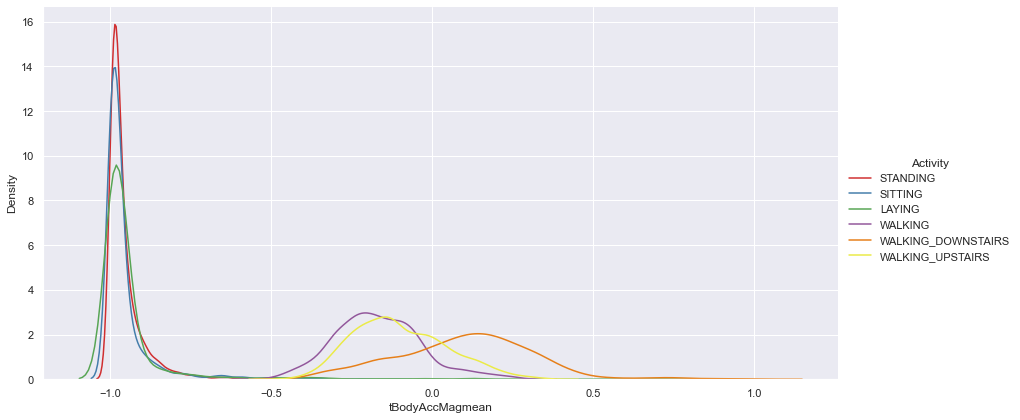

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

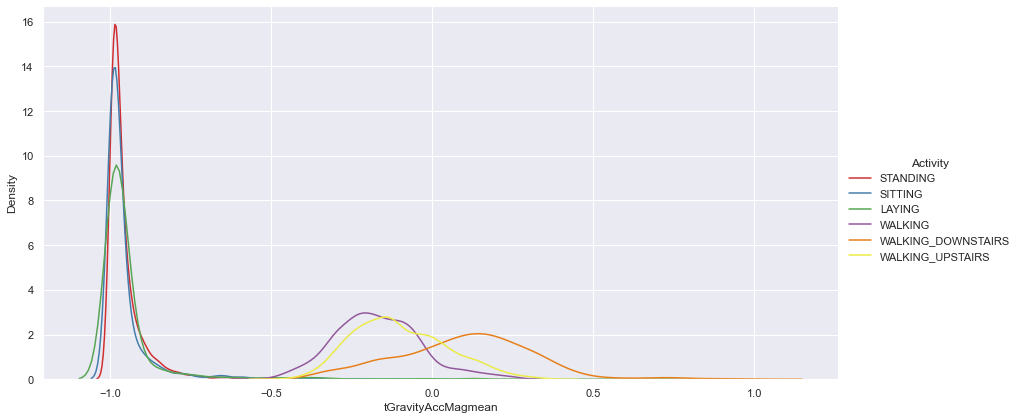

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

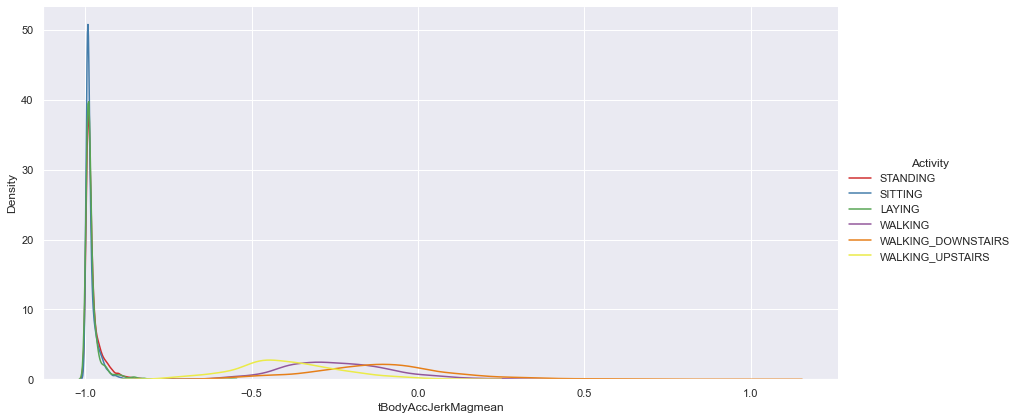

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

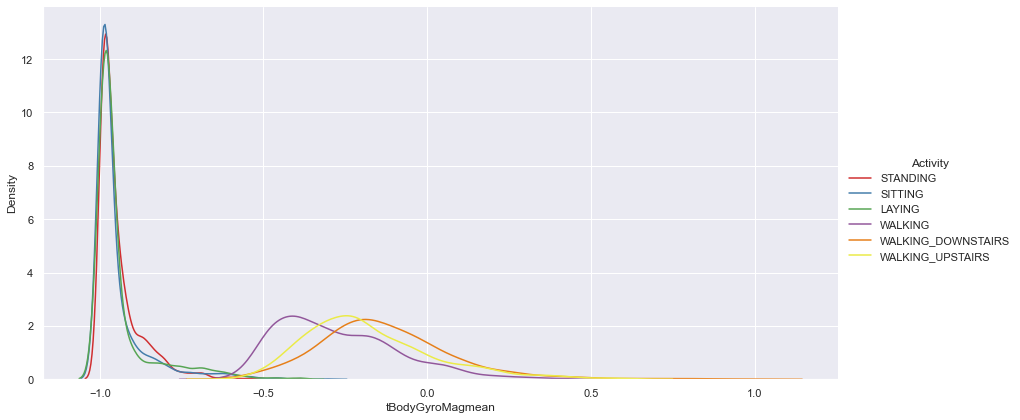

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

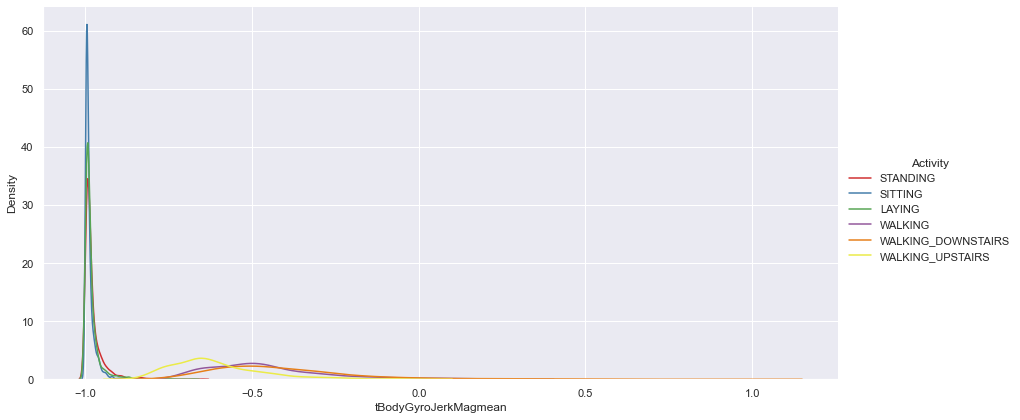

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

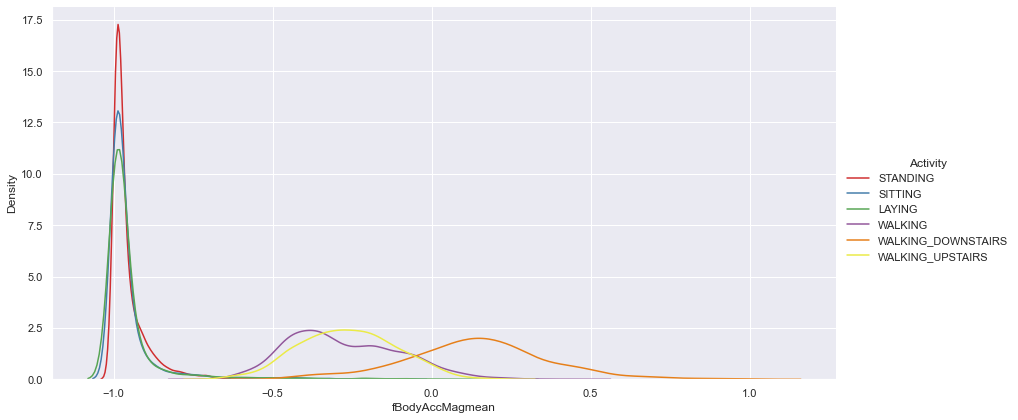

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

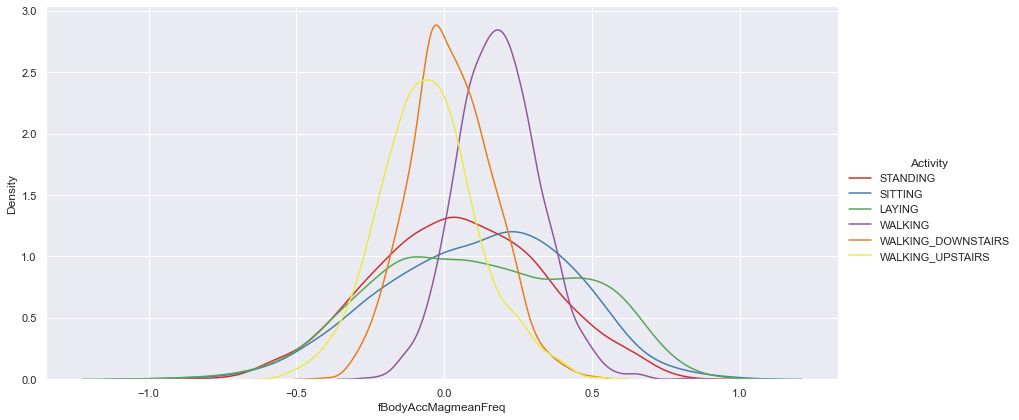

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

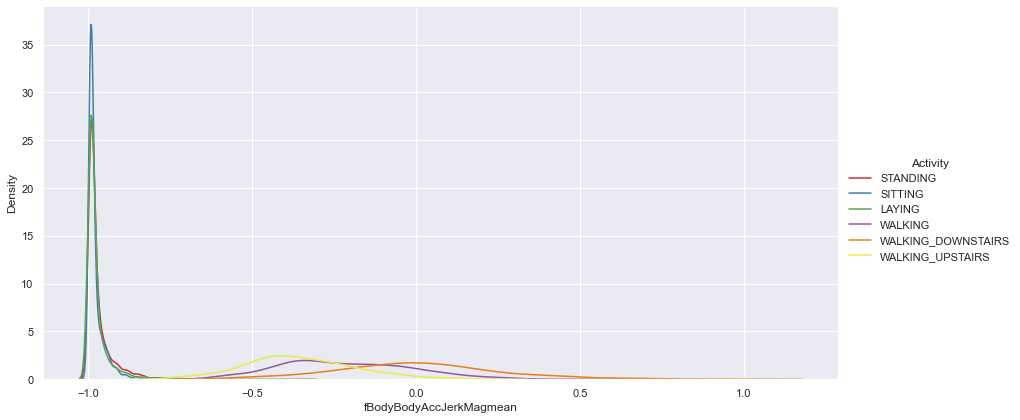

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

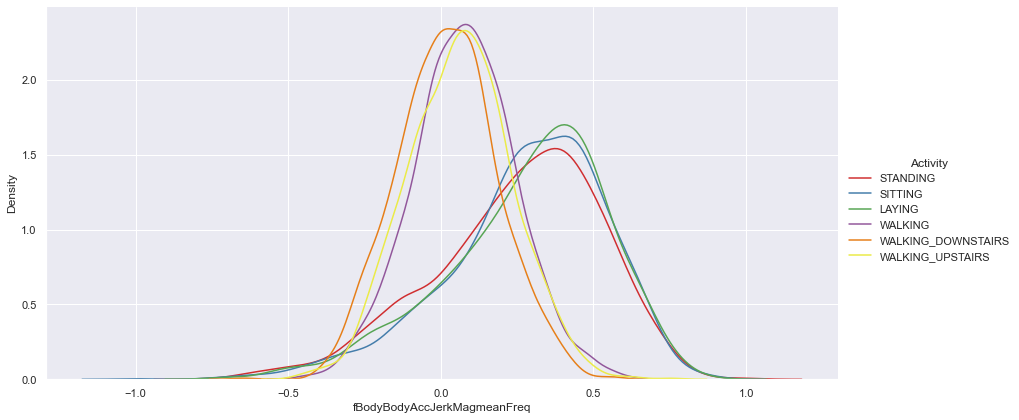

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

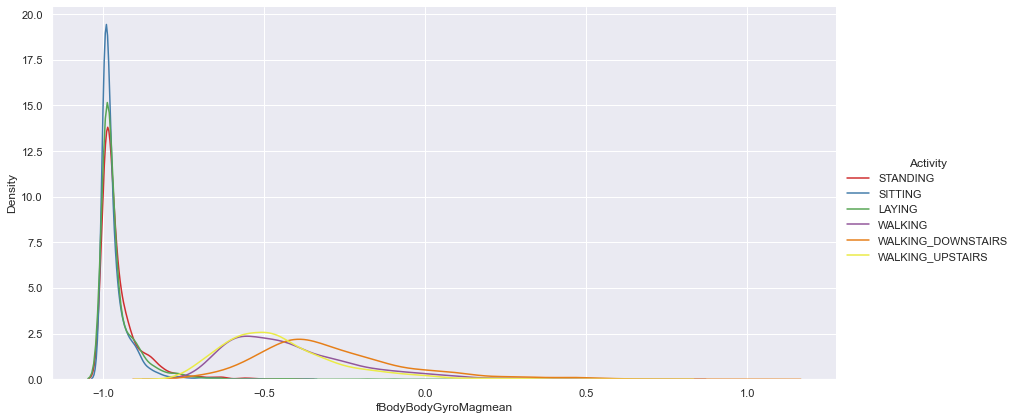

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

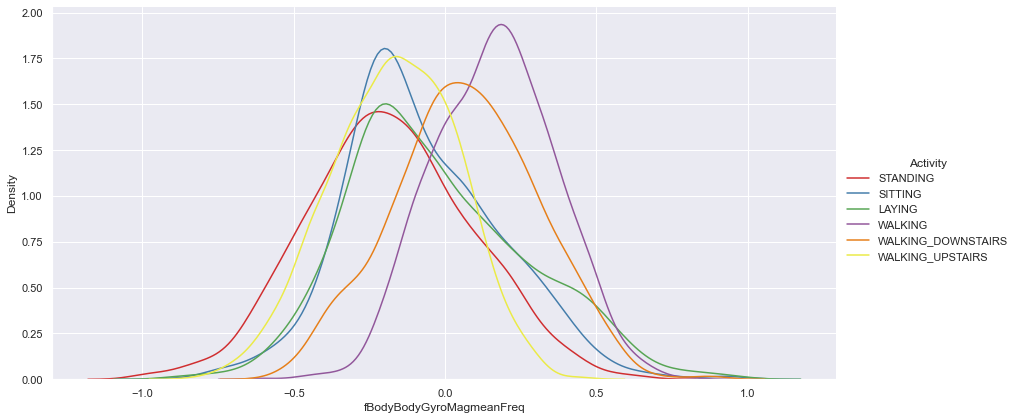

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

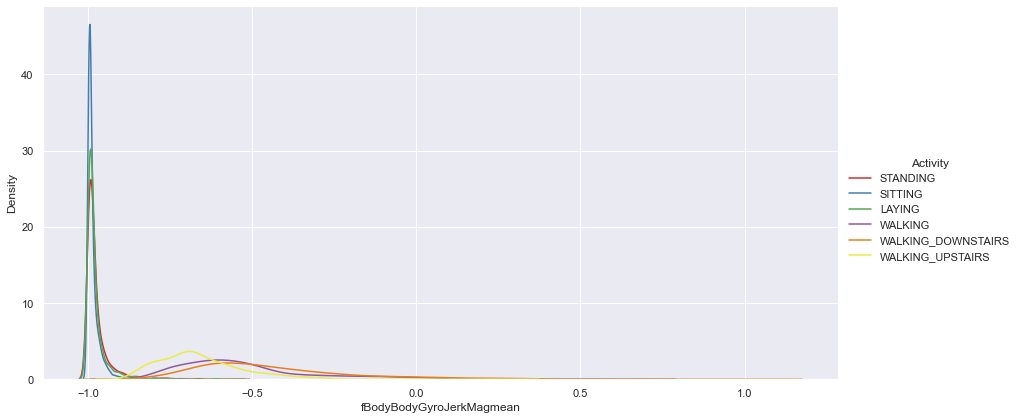

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

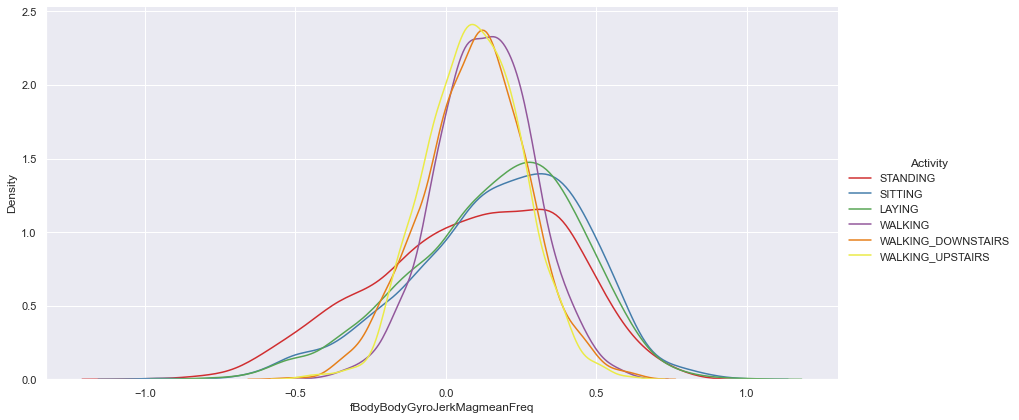

In [16]:
### 这个太长了，你们看看要不要？
def plotDist(something):
    sb.set_palette("Set1", desat=0.80)
    facetgrid = sb.FacetGrid(df_total, hue='Activity', height=6,aspect=2)
    facetgrid.map(sb.distplot,something, hist=False).add_legend()
    plt.show()
for x in explore_data:
    plotDist(x)

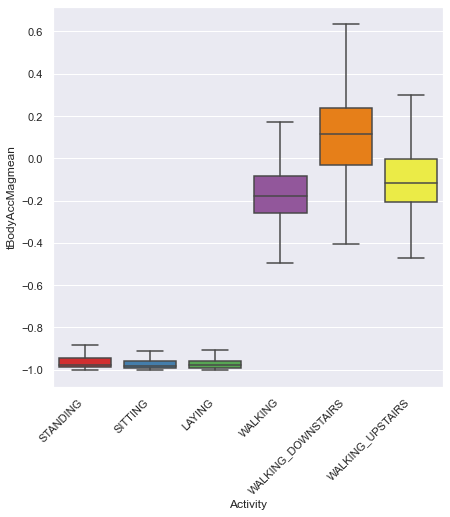

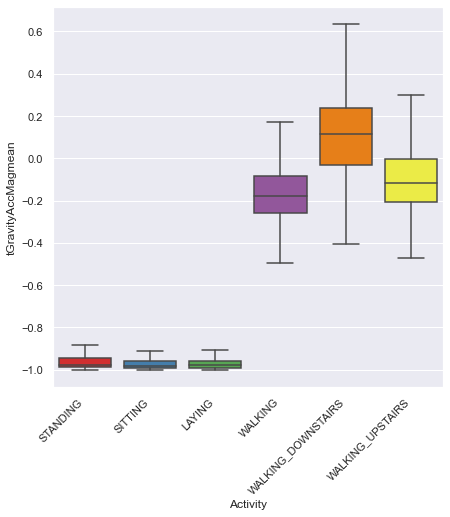

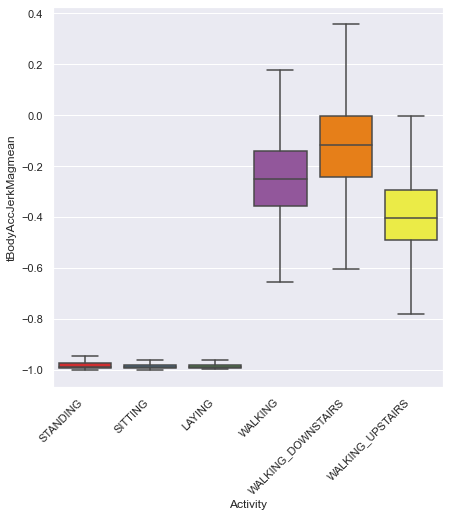

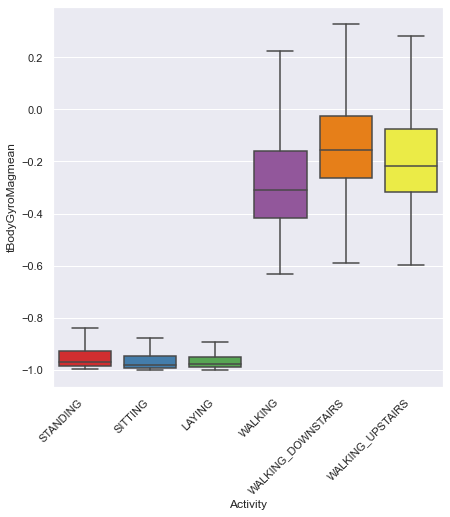

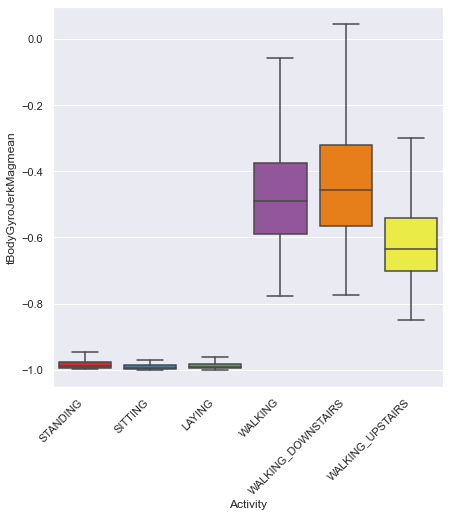

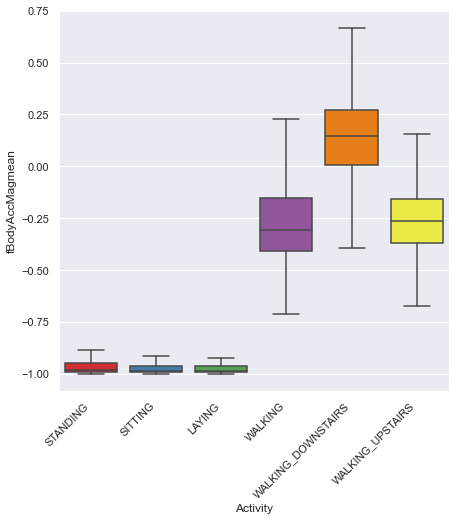

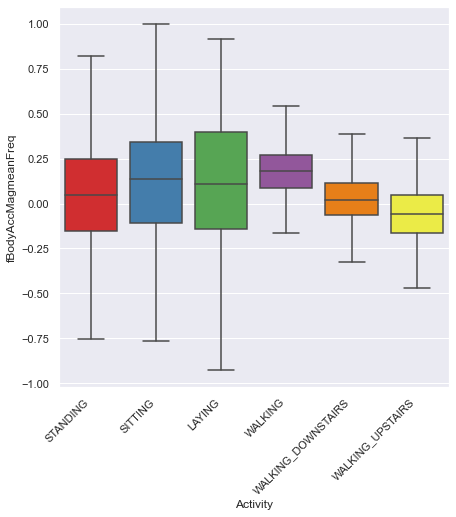

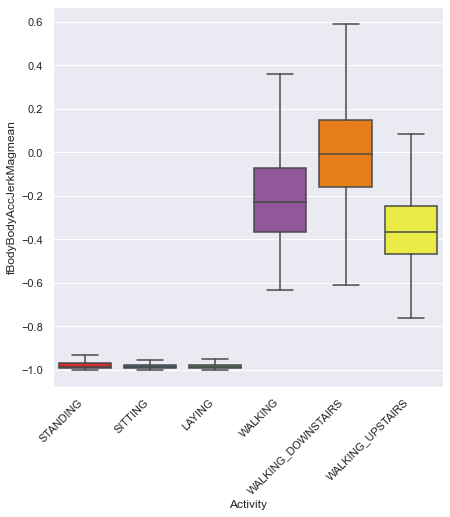

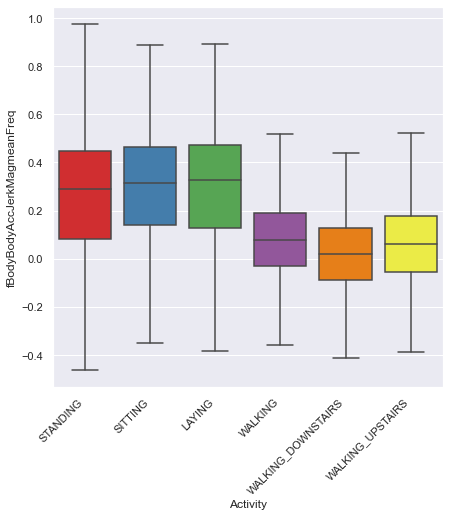

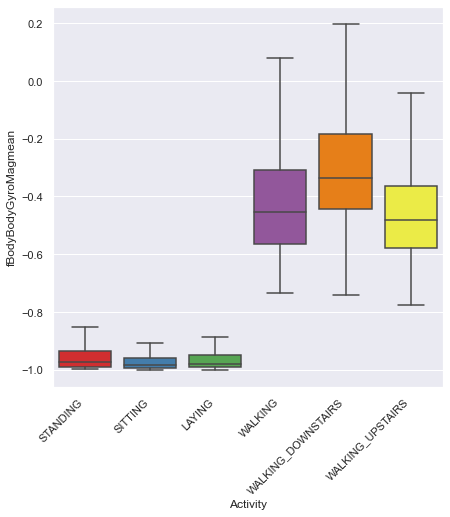

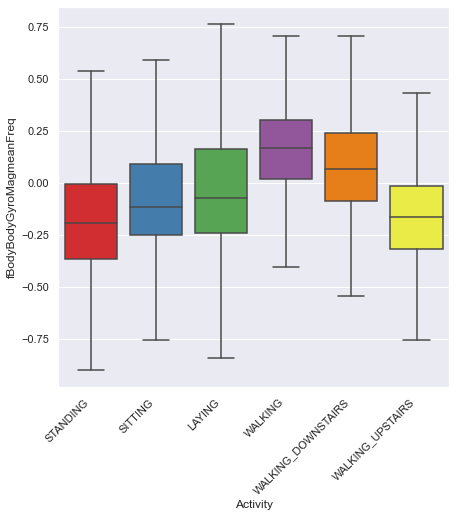

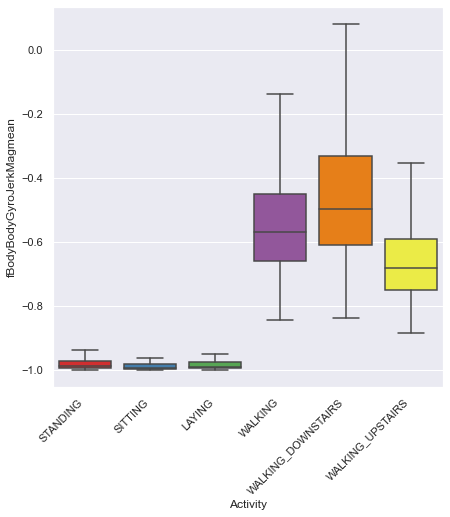

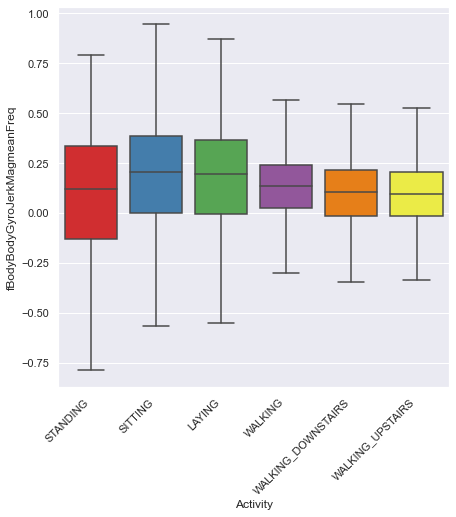

In [17]:
### Plotting 1 graph only
for x in explore_data:
    plt.figure(figsize=(7,7))
    sb.boxplot(x='Activity', y=x,data=df_total, showfliers=False, saturation=1)
    plt.ylabel(x)
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

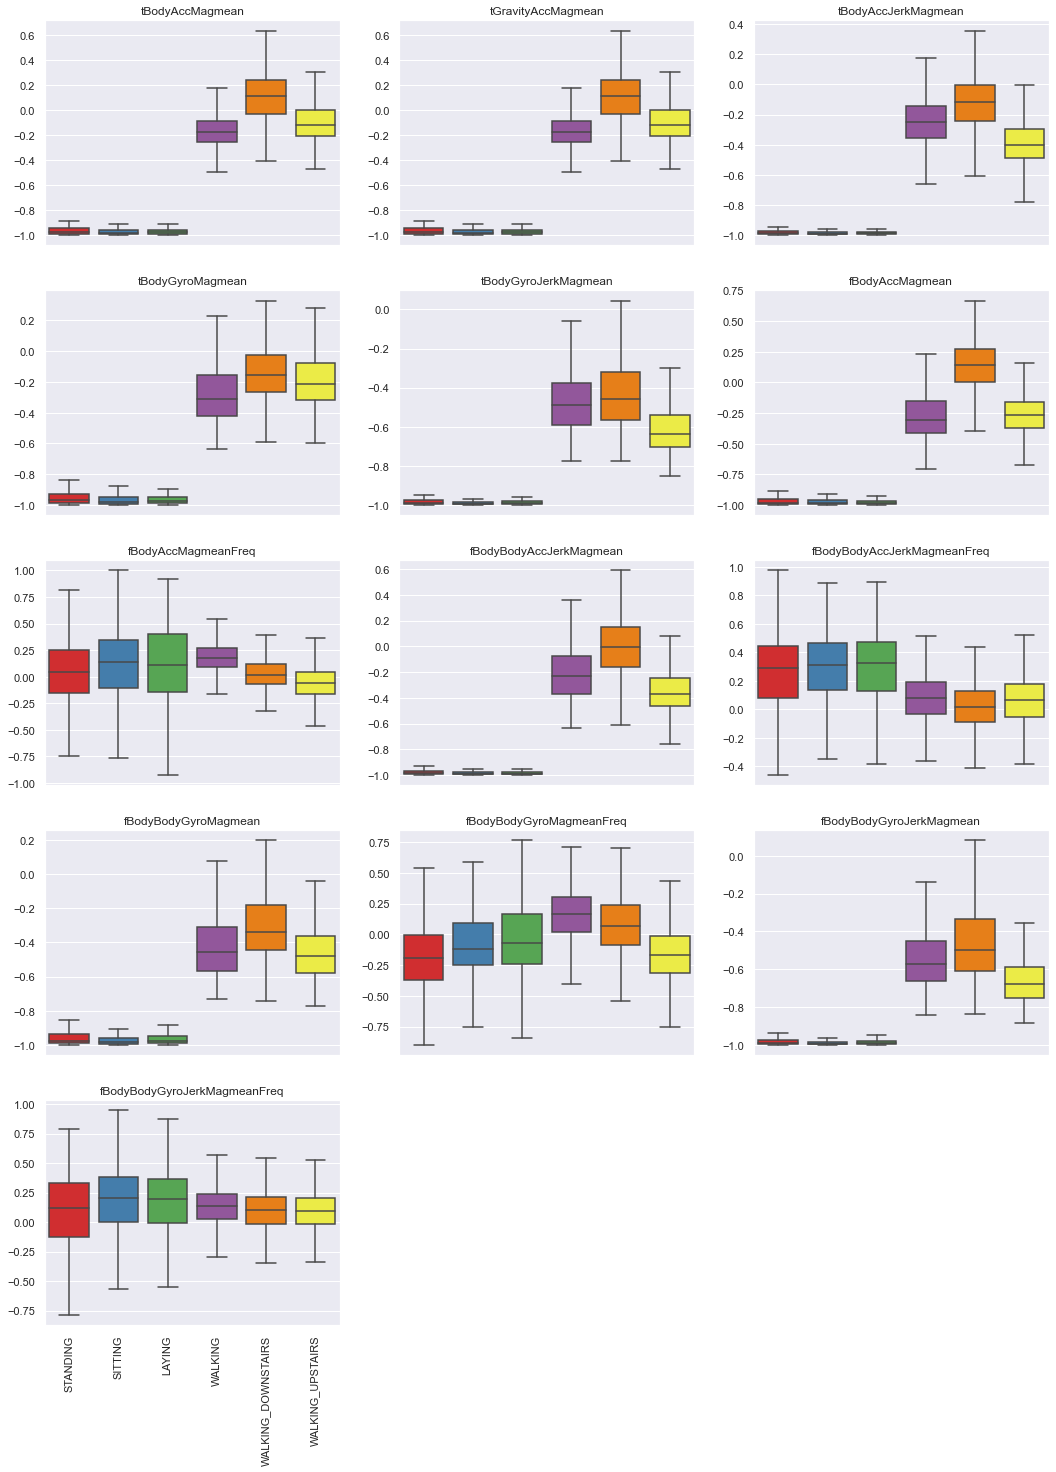

In [18]:
### Overview of all 13 variables that include the term "mag-mean"
f, axes = plt.subplots(5, 3, figsize=(18, 24),sharex=True)
colCount = 0
rowCount = 0
for x in explore_data:
    if colCount == 3:
        colCount = 0
        rowCount += 1
    temp = sb.boxplot(x='Activity', y=x,data=df_total, showfliers=False, saturation=1,ax=axes[rowCount,colCount])
    temp.set(xlabel=None)
    temp.set(ylabel=None)
    temp.set(title=x)
    #temp.set_xticklabels(temp.get_xticklabels(), rotation=90, horizontalalignment='right')
    colCount += 1
### Removing the 2 extra subplots that do not have data (13 variable in a 5x3 subplot table)
f.delaxes(axes[4][1])
f.delaxes(axes[4][2])
plt.xticks(rotation=90)


##### From here, we can see that all variables that include the term "freq" which stands for frequency does not really help to differentiate the "Activity". However all other chosened variables such as "tBodyAccMagmean" helps to distinguish between static activities (standing,sitting,laying) and dynamic activities (walking,walking upstairs/downstairs).

### TSNE visualization of the data

C:\Users\Nomla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

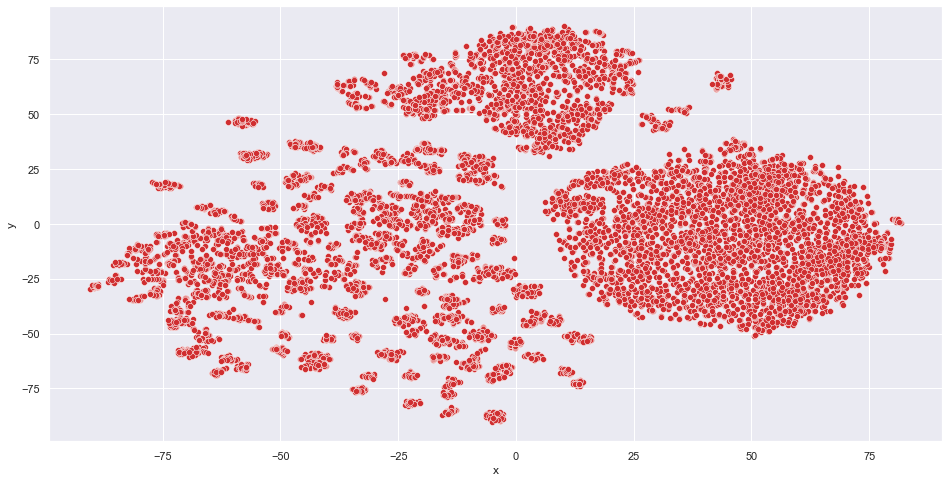

In [19]:
# drop all non-numeric data
non_numeric = ["subject", "Activity"]
df_numeric = df_total.drop(non_numeric, axis=1)

# TSNE fitting
from sklearn.manifold import TSNE

m = TSNE(learning_rate=200)
tsne_features = m.fit_transform(df_numeric)
tsne_features[1:4:, :]
df_total["x"] = tsne_features[:, 0]
df_total["y"] = tsne_features[:, 1]

# plot using seaborn
plt.figure(figsize=(16,8))
sb.scatterplot(x="x", y="y", data=df_total)


<AxesSubplot:xlabel='x', ylabel='y'>

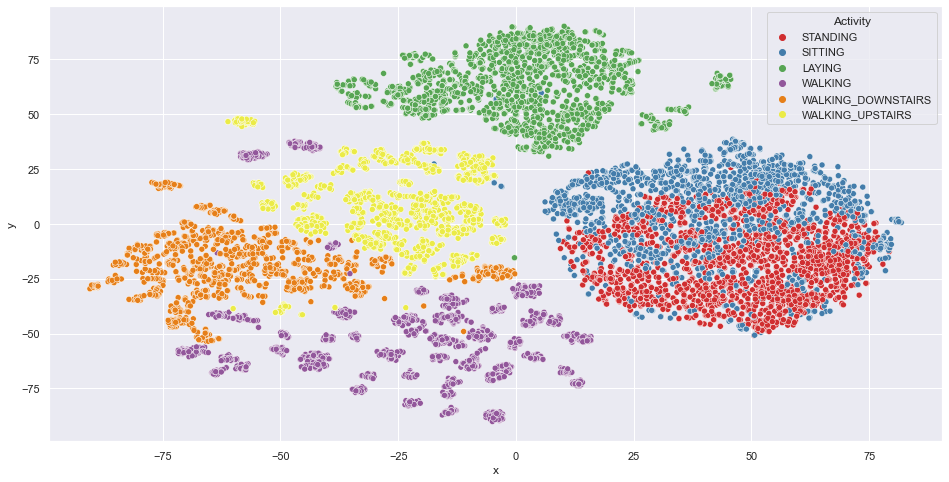

In [20]:
plt.figure(figsize=(16,8))
sb.scatterplot(x="x", y="y", hue="Activity", data=df_total)

<AxesSubplot:xlabel='x', ylabel='y'>

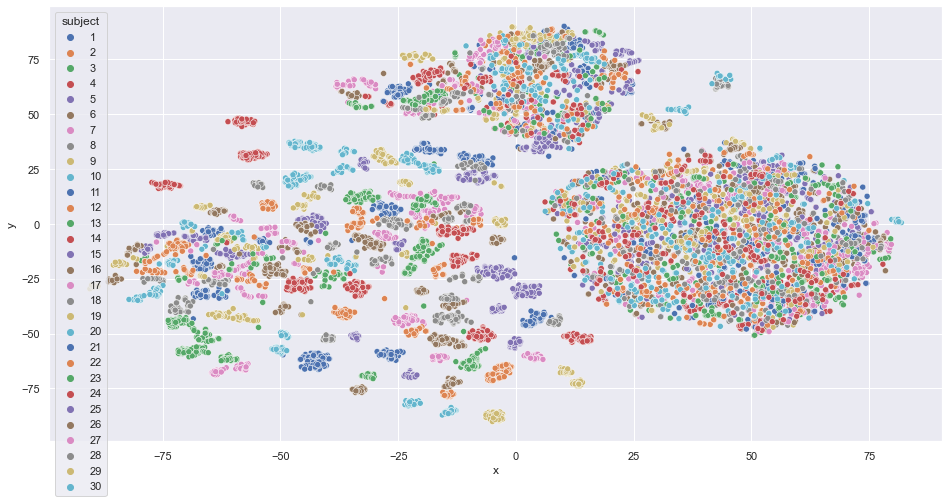

In [21]:
plt.figure(figsize=(16,8))
sb.scatterplot(x='x', y='y', hue = 'subject', data = df_total,palette="deep")

参考https://www.kaggle.com/code/vikashrajluhaniwal/eda-all-classification-algorithms-with-96-acc， 查资料写pros and cons

a Logistic regression model with Hyperparameter tuning and cross validation

    pros:

    cons:

b Linear SVM model with Hyperparameter tuning and cross validation

c Kernel SVM model with Hyperparameter tuning and cross validation

d Decision tree model with Hyperparameter tuning and cross validation

    pros:
    1. Easy to interpret
    2. Handles both categorical and numerical data
    3. Works well on a large dataset
    4. Not sensitive to outliers
    5. Non-parametric in nature

    cons:
    1. Prone to overfitting
    2. Can be quite large, make pruning necessary
    3. Cannot guarantee optimal trees
    4. Gives relatively low prediction accuracy
    5. High variance (model is g)

e Random forest model with Hyperparameter tuning and cross validation

    Essentially an ensemble version of the Decision Trees. Random Forest = Decision Tree's simplicity * Accuracy through randomness

    pros:

    1. Robust to outliers
    2. Works well with non-linear data
    3. Lower risk of overfitting
    4. Runs efficiently on a large dataset
    5. Better Accuracy than other classification algorithms.

    cons:
    1. Normally biased while dealing categorical variables
    2. Slow training
    3. Nor suitable for linear methods with a lot of sparse features.
